## 说明

请按照填空顺序编号分别完成 参数优化，不同基函数的实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    """载入数据。"""
    xys = []
    with open(filename, 'r') as f:
        for line in f:
            # 1. 移除该行字符串的首尾空格或换行符
            # 2. 将字符串按空格分割成多个部分, 返回一个列表
            # 3. 将每个部分转换为浮点数, 返回一个映射对象
            # 4. 将当前行的浮点数列表追加到 xys 列表中
            xys.append(map(float, line.strip().split()))
            
        # 解压 xys 列表, 分别将所有行中的第一个值和第二个值分组, 形成两个元组 xs 和 ys
        xs, ys = zip(*xys)

        # 测试输出
        # xs = np.asarray(xs)
        # print(xs.shape)
        #
        # 输出:
        # (300,)

        # np.array 和 np.asarray 的区别
        # 1. np.array 默认情况下总是会复制输入的数据, 即使输入已经是一个 NumPy 数组
        # 2. 如果输入是一个 NumPy 数组, 并且其数据类型和要求一致. 则 np.asarray 返回的就是原数组, 不会创建新的副本
        return np.asarray(xs), np.asarray(ys)

# load_data("train.txt")

## 不同的基函数 (basis function)的实现 填空顺序 2

请分别在这里实现“多项式基函数”以及“高斯基函数”

其中以及训练集的x的范围在0-25之间

In [6]:
# 扩展维度函数
# 通过指定的 axis 参数, 向数组的第 1 个维度 (索引从 0 开始) 插入一个新的维度
# 若输入数组 x 的形状为 (m,), 则扩展后形状变为 (m, 1)
# 若输入数组 x 的形状为 (m, n), 则扩展后形状变为 (m, 1, n)
def identity_basis(x):
    ret = np.expand_dims(x, axis=1)
    return ret

# 代码来源: linear_regression-tf2.0.ipynb
def multinomial_basis(x, feature_num=10):
    '''多项式基函数'''
    x = np.expand_dims(x, axis=1) # shape(N, 1)
    #==========
    #todo '''请实现多项式基函数'''
    #==========
    feat = [x]
    for i in range(2, feature_num + 1):
        feat.append(x ** i)
    ret = np.concatenate(feat, axis=1)
    return ret

# 代码来源: linear_regression-tf2.0.ipynb
def gaussian_basis(x, feature_num=10):
    '''高斯基函数'''
    #==========
    #todo '''请实现高斯基函数'''
    #==========
    centers = np.linspace(0, 25, feature_num)
    width = 1.0 * (centers[1] - centers[0])
    x = np.expand_dims(x, axis=1)
    x = np.concatenate([x] * feature_num, axis=1)
    out = (x - centers) / width
    ret = np.exp(-0.5 * out ** 2)
    return ret

# 测试输出
# x = np.array([1, 2, 3, 4])
# print(multinomial_basis(x))
# print(gaussian_basis(x))
# 输出:
'''
[[      1       1       1       1       1       1       1       1       1
        1]
 [      2       4       8      16      32      64     128     256     512
     1024]
 [      3       9      27      81     243     729    2187    6561   19683
    59049]
 [      4      16      64     256    1024    4096   16384   65536  262144
  1048576]]

[[9.37254896e-01 8.14810262e-01 2.60591821e-01 3.06598898e-02
  1.32704581e-03 2.11303534e-05 1.23775054e-07 2.66725787e-10
  2.11447427e-13 6.16659351e-17]
 [7.71668674e-01 9.61558378e-01 4.40784141e-01 7.43330209e-02
  4.61150966e-03 1.05247062e-04 8.83654224e-07 2.72935642e-09
  3.10129919e-12 1.29638082e-15]
 [5.58109555e-01 9.96805115e-01 6.54947630e-01 1.58310023e-01
  1.40771833e-02 4.60498942e-04 5.54175123e-06 2.45341454e-08
  3.99576889e-11 2.39406151e-14]
 [3.54587549e-01 9.07737535e-01 8.54875017e-01 2.96176417e-01
  3.77488601e-02 1.76995705e-03 3.05300229e-05 1.93730077e-07
  4.52243665e-10 3.88376952e-13]]
'''

[[9.37254896e-01 8.14810262e-01 2.60591821e-01 3.06598898e-02
  1.32704581e-03 2.11303534e-05 1.23775054e-07 2.66725787e-10
  2.11447427e-13 6.16659351e-17]
 [7.71668674e-01 9.61558378e-01 4.40784141e-01 7.43330209e-02
  4.61150966e-03 1.05247062e-04 8.83654224e-07 2.72935642e-09
  3.10129919e-12 1.29638082e-15]
 [5.58109555e-01 9.96805115e-01 6.54947630e-01 1.58310023e-01
  1.40771833e-02 4.60498942e-04 5.54175123e-06 2.45341454e-08
  3.99576889e-11 2.39406151e-14]
 [3.54587549e-01 9.07737535e-01 8.54875017e-01 2.96176417e-01
  3.77488601e-02 1.76995705e-03 3.05300229e-05 1.93730077e-07
  4.52243665e-10 3.88376952e-13]]


'\n[[      1       1       1       1       1       1       1       1       1\n        1]\n [      2       4       8      16      32      64     128     256     512\n     1024]\n [      3       9      27      81     243     729    2187    6561   19683\n    59049]\n [      4      16      64     256    1024    4096   16384   65536  262144\n  1048576]]\n'

## 返回一个训练好的模型 填空顺序 1 用最小二乘法进行模型优化 
## 填空顺序 3 用梯度下降进行模型优化
> 先完成最小二乘法的优化 (参考书中第二章 2.3中的公式)

> 再完成梯度下降的优化   (参考书中第二章 2.3中的公式)

在main中利用训练集训练好模型的参数，并且返回一个训练好的模型。

计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w

In [3]:
def least_square(X, y):
    # 最小二乘法公式 (Markdown 语法): w^{*} = (XX^{T})^{-1}Xy
    # 此处假设 XX^{T} 存在逆矩阵
    # @ 是矩阵乘法运算符 (Python 版本 3.5 及以上), 等价于 np.dot
    xxt = X @ X.T
    xxt_inverse = np.linalg.inv(xxt)
    w = xxt_inverse @ X @ y
    return w

In [4]:
def gradient_descent(X, y, alpha=0.01, max_iter=10000, tolerance=1e-4):
    # 梯度下降公式 (Markdown 语法): w <- w + \alpha X(y - X^{T}w)
    # 初始时, w 为零向量
    # 适用于 XX^{T} 不存在逆矩阵的情况
    #
    #==========定义相关超参数==========
    # 学习率: alpha
    # 迭代次数: max_iter
    # 容忍度: tolerance, 若错误率不再下降 (差值在容忍度内), 则提前停止训练
    #=================================
    w = np.zeros((X.shape[0], 1))

    for i in range(max_iter):
        # 更新 w
        y_pred = X.T @ w
        error = y - y_pred
        gradient = X @ error / y.shape[0]
        w += alpha * gradient

        # 判断是否可以提前停止训练
        if np.linalg.norm(gradient) < tolerance:
            print(f"梯度下降在第 {i+1} 次迭代后收敛.")
            break
    
    else:
        print("梯度下降达到最大迭代次数, 未完全收敛.")
    
    return w

In [5]:
def main(x_train, y_train):
    """
    训练模型，并返回从x到y的映射。
    
    输入:
    x_train: shape(N, )
    y_train: shape(N, )
    """

    # 给扩展维度函数 identity_basis 起别名为 basis_func
    basis_func = identity_basis

    # 构造常数项特征 phi0, 形状为 (n, 1), 值全为 1
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1)

    # 将 x_train 转换为二维数组 phi1, 形状为 (n, 1)
    phi1 = basis_func(x_train)

    # 将 phi0 和 phi1 按列拼接, 形状为 (n, 2)
    # 每一行对应一个样本, 第一列为常数项 1, 第二列为样本的输入特征值
    phi = np.concatenate([phi0, phi1], axis=1)

    y = basis_func(y_train)

    # 测试输出
    # print(phi)
    # print(phi.shape)
    #
    # 输出:
    '''
    [[ 1.    2.65]
    [ 1.    4.7 ]
    [ 1.   14.25]
    ...
    [ 1.    5.2 ]
    [ 1.   10.1 ]
    [ 1.    1.55]]
    (300, 2)
    '''



    #==========
    #todo '''计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w'''
    #==========

    # 最小二乘法
    # 需要将 phi 转置以应用公式, 即 phi 的形状为 (2, n)
    # w = least_square(phi.T, y)

    # 梯度下降
    # 仍然需要将 phi 转置以应用公式
    w = gradient_descent(phi.T, y)
    


    # 给定样本 x 进行预测 (线性回归)
    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = basis_func(x)
        phi = np.concatenate([phi0, phi1], axis=1)
        y = np.dot(phi, w)
        return y

    return f

# x_train, y_train = load_data("train.txt")
# main(x_train=x_train, y_train=y_train)

## 评估结果 
> 没有需要填写的代码，但是建议读懂

(300,)
(200,)
梯度下降在第 2807 次迭代后收敛.
训练集预测值与真实值的标准差：9.8
预测值与真实值的标准差：9.9


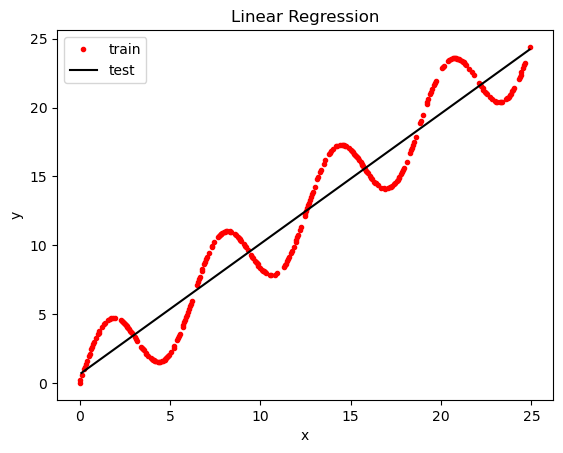

In [6]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    # 计算预测误差的标准差
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)

    # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
    f = main(x_train, y_train)

    y_train_pred = f(x_train)
    std = evaluate(y_train, y_train_pred)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))
    
    # 计算预测的输出值
    y_test_pred = f(x_test)
    # 使用测试集评估模型
    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
#     plt.plot(x_test, y_test, 'k')
    plt.plot(x_test, y_test_pred, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'pred'])
    plt.show()